**Привет, Руслан!**

Меня зовут Анастасия Ефременко, я буду проверять твой проект. Предлагаю тебе общаться на "ты", но если тебе это некомфортно, дай знать и мы перейдем на "Вы". Цель этого ревью: помочь тебе довести проект до совершенства. Так, как это хотел бы видеть работодатель. 

Прошу тебя не удалять мои комменатрии пока проект не будет принят, чтобы облегчить нам процес работы.

Свои комменатрии я выделяю разными цветами, и вот что это значит:

<div class="alert alert-danger">
<b>Осторожно!</b> 
Красным цветом выделены недочеты, на которые обязательно нужно обратить внимание. Их следует исправить в твоей работе.</div>

<div class="alert alert-warning">
<b>Рекомендация:</b> 
Желтым цветом я оставляю тебе советы, которые стоит принять во внимание. Если есть желание, можешь исправить их. </div>

<div class="alert alert-success">
<b>Good job! </b> Ну а зеленым цветом будет помечена обратная связь по твоему проекту.</div>

Предлагаю тебе работать в тандеме, поэтому ответы на мои комментарии, возникающие по ходу работы вопросы можешь выделять синим цветом.
<div class="alert alert-info">
<b>Комментарий студента:</b> выделяется синим цветом. </div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Привет Анастасия! Рад знакомству! На ты - отлично! Спасибо запроверку и комментарии, ниже я поправил все, что отмечено так, как сумел. Буду рад твоим комментариям и советам! </div>

# Исследование данных о российском кинопрокате



Пути к файлам:
- /datasets/mkrf_movies.csv — данные о прокатных удостоверениях.
- /datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах.


**Описание таблиц**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Молодец, что сделал оглавление и добавил описание проекта с описанием данных.
</div>

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

**Импортируем рабочие библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

**Откроем файлы и проведем объединение в единый датафрейм**

In [2]:
data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data2 = pd.read_csv('/datasets/mkrf_shows.csv')
#data1.info() и data2.info() подсказали нам, что колонка для объедниения может быть puNumber, однако data1.dtypes говорит, что разный тип данных, это мешает провести объединение ==> проведем изменение типа данных 
#data1['puNumber'].astype('int') - выдает ошибку ValueError: invalid literal for int() with base 10: 'нет', то есть в какой-то ячейке вместо чисел вписан текст, найдем ее.
#df1 = data1[data1['puNumber'].str.contains("нет")] - 1797 строка содержит значение "нет" вместо чисел. Посмотрим по столбцу title есть ли еще это название фильтма, чтобы найти номер прокатного удостоверения и зменить его в этой ячейке
#df1 = data1[data1['title'].str.contains("Курбан-роман")] - на строке 2078 находится то же название и мы видим номер прокатного удостоверения 111009614, можем его подставить вместо "нет"

data1.loc[1797, 'puNumber'] = 1110096141 #Да, это не совсем корректный способ поиска и замены некорректных значений; не могу сообразить сходу как это сделать, может функцию написать? Надо как то искать дубликаты и подставлять в этой конкретно колонке нужные значения.Добавил 1 чтобы значения отличались и не удалять строчку
data1['puNumber'] = pd.to_numeric(data1['puNumber'])
data2['puNumber'] = data2['puNumber'].astype(int)
df = data1.merge(data2, on='puNumber', how='outer')
df.head(3)
#Проведя объединение данных можем приступать к их обработке

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Круто, что ты подробно описал, как именно ты объединял датафреймы и какой логикой руководствовался.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> 
    
Однако не стоит приравнивать строковое значение к уже имеющемуся, так как номера прокатного удостоверения должны быть уникальны. Лучше всего было бы либо просто удалить эту строку, либо заменить ее другим неповторяющимся номером, например, добавить еще одну цифру к номеру, которые есть у этого же фильма.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Да, согласен. Я добавил цифру 1 к номеру. На будущее буду иметь ввиду такой лайфхак. Мне не хотелось удалять строчку просто. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 
    
👍
</div>

In [3]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.353268e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.997137e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.110096e+09,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


In [4]:
df.columns.tolist()

['title',
 'puNumber',
 'show_start_date',
 'type',
 'film_studio',
 'production_country',
 'director',
 'producer',
 'age_restriction',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'financing_source',
 'ratings',
 'genres',
 'box_office']

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
df.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [6]:
df['ratings'].unique()
#В столбце ratings - встречаются значения "91%", вместо типового "7.2" - это явно ошибка заполнения данных в разных форматах. К тому же столбец типа object а не float. 


array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [7]:
#Посмотрим что за строки, в которых пропущены значения рейтинга 
display(df[df['ratings'].isna()])
#между стркоами нет ничего общего, рейтинг нам не известен, но мы могли бы поменять на среднее/медианное значение по столбцу, однако 967 строк это почти 13% данных, они могут существенно повлиять на общую картину, поэтому оставим пока что как есть. 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#старый вариант замены значений на 0.0х
#df['ratings'] = (pd.to_numeric(df['ratings'].str[:-1])
                            #.div(100)
                           # .mask(df['ratings'] == '%', 0).astype('float'))
#df['ratings']

In [9]:
#новый вариант замены значений
def parseFloat(str):
    try:
        return float(str)
    except:
        str = str.strip()
        if str.endswith("%"):
            return float(str.strip("%").strip()) / 10
        raise Exception("Don't know how to parse %s" % str)

df['ratings'] = df['ratings'].apply(parseFloat)
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [10]:
df['ratings'].dtype

dtype('float64')

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> 
    
Хорошо, что ты заметил эти проценты в рейтинге, но не стоит из-за них сбивать всю рейтинговую шкалу. Она должна остаться от 0 до 10, и поработать нужно только над рейтингом с процентами.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Я очень долго искал каим образом мне приравнять все значения. Другого способа на тот момент я не нашел(. Сейчас попробовал другим способом решить то же самое - нашел похожую функцию на stuck overflow, только изменил деление. Однако осталась проблема с отсутствующими значениями после плавающей точки - напрмиер "5. " - как такое решать?. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 
    
Это вполне нормально, просто в данной записи, если после запятой идут нули, они просто не пишутся, то есть `5` - это тоже самое, что `5.  `.
    
Молодец, что пользуешься stack overflow. Невозможно все уметь, так что гугление - это важный навык.
</div>

In [11]:
#2015-11-27T12:00:00.000Z - преобразуем в простую форму
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%I:%M:%S.000Z')
df.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Отлично.
</div>

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [12]:
print(df.isna().sum()/len(df)*100)

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  12.917446
genres                   13.037670
box_office               57.814587
dtype: float64


Для полноценного анализа данных нам стоило бы преобразовать эти столбцы следующим образом:
- show_start_date - избавимся от времени в часах и минутах, оно нам не нужно в рамках исследования
- ratings - перобразуем в числовое значение
- refundable_support - переведем в целочисленное
- nonrefundable_support - переведем в целочисленное
- budget - переведем в целочисленное
- box_office - переведем в целочисленное

Однако, в некоторых столбцах отсутствуют значения - мы не знаем природу пропусков. 


<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Хорошо, что посчитал процент пропусков и расписал планы на каждый столбец.
</div>

In [13]:
#Можно было бы заполнить пропуски в следующих столбцах на ноль или -1, но это не поможет нашему исследованию, а только запутает. Лучше отработать с теми значениями, которые есть.
#df['refundable_support'] = df['refundable_support'].fillna(0).astype(int)
#df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0).astype(int)
#df['budget'] = df['budget'].fillna(0).astype(int)
#df['box_office'] = df['box_office'].fillna(-1).astype(int) #в сборах в рублях укажем отрицательные значения, чтобы пр идальнейшем анализе можно было фильтром пользоваться
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 994.2+ KB


<div class="alert alert-danger">
<b>Комментарий ревьюера v2: </b> 
    
Остожно, не стоит заполнять пропуски заглушкой для сборов. Отстутствие информации по сборам - это абсолютно нормально.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> По итогу убрал здесь заполнение заглушкой -1 </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3: </b> 
    
Отлично.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Согласна с тем, что ты не стал заполнять нулями пропуски, так как это может нарушить логику исследования. В данных столбцах присутствуют нули, и мы бы только смешали имеющиеся нули с пропусками. Имеющийся ноль означает, что денег не было, а пропуск означает, что мы не знаем, были ли деньги.
</div>

In [14]:
#В столбце жанр заполним пропуски на неизвестный жанр, чтобы в дальнейшем пр ианализе не путаться.
df['genres'] = df['genres'].fillna('unknown')
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

In [15]:
df['producer'] = df['producer'].fillna('unknown')
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [16]:
df['director'] = df['director'].fillna('unknown')
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Согласна, в строковых столбцах вполне можно заполнить пропуски заглушкой.
</div>

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [17]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


In [18]:
print('Количество дубликатов по номеру удостоверения:', df['puNumber'].duplicated().sum())

Количество дубликатов по номеру удостоверения: 2


In [19]:
df['puNumber'] = df['puNumber'].drop_duplicates()
print('Количество дубликатов по номеру удостоверения:', df['puNumber'].duplicated().sum())

Количество дубликатов по номеру удостоверения: 1


<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 
    
Супер, явных дубликатов нет.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> 
    
Как я уже говорила выше, нужно проверить наличие дубликатов по номеру прокатного удостоверения, так как оно 100% должно быть уникально.
</div>

<div class="alert alert-info">
<b>По номеру удостоверения найдено 2 и удален 1 дубликат. Вопрос - почему метод не удалил второй дубликат? это может быть связано с тем, что я заменил в самом начале отсутствующее значение номера удостоверения на похожже, добавив число 1? </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2: </b> 
    
Дело в том, что одна из строк-дубликатов имеет пропуск в номере прокатного удостоверения. Нужно удалить эту строку и попробовать еще раз избавиться от дубликатов.
</div>

In [20]:
#Удаляю строку с пропуском номера прокатного удостоверения и снова удаляю дубликаты
df.dropna(subset = ['puNumber'], inplace = True)
df['puNumber'] = df['puNumber'].drop_duplicates()
print('Количество дубликатов по номеру удостоверения:', df['puNumber'].duplicated().sum())

Количество дубликатов по номеру удостоверения: 0


<div class="alert alert-info">
<b>Во, удалил! </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3: </b> 
    
Ура! Долой дубликаты!
</div>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [21]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [22]:
df['type'].unique()
#В столбце присутствуют пробелы лишние в названиях категорий

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [23]:
df['type'] = df['type'].str.strip()
df['type']

0       Художественный
1       Художественный
2       Художественный
3       Художественный
4       Художественный
             ...      
7481            Прочие
7482    Художественный
7483    Художественный
7484      Анимационный
7485      Анимационный
Name: type, Length: 7484, dtype: object

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> 
    
Отлично, только вот ты забыл сохранить. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> ой) поправил, сохранил туда же. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> ✔  </div>

In [24]:
df['film_studio'].unique()
# 'Анимаккорд Лтд. и  ООО Студия "АНИМАККОРД" - возможно это одно и то же, просто по-разнмоу записанное, но мы этого не знаем наверняка.

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [25]:
df['production_country'].unique()
#Присутствует разное написание дефиса когда более 1 страны: 'США-Канада' и 'Великобритания - Италия', а также есть варианты, где 'СССР, Финляндия', то есть без дефиса. 

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

<div class="alert alert-warning">
<b>Комментарий ревьюера: </b> 
    
И все же надо оставить небольшой комментарий с ответом на вопрос: "какая общая проблема встречается почти во всех категориальных столбцах".
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Добавил ниже </div>

Общая проблема для категориальных значений - отсутствие единого стандарта заполнения, что приводит к увеличению набора данных с разной записью, но одним значением. В дальнейшем все значения надо привести к единому стандарту заполнения (я подразумеваю что данные собирались в базу годами и по-размномц разные люди добавляют категориальные значения). Как вариант - при внесении данных в базу для категориальных значений должны быть выпадающие списки с готовыми значениями, а новые значения должны добавляться по запросу. Это поможет в дальнейшем обеспечить однородность заполненных данных и упростить анализ, повысить его точность.

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 
    
Абсолютно верно.
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Столбцы budget, refundable_support и nonrefundable_support а также financing_source - заполнены тольок 332 строки (4.4% от датасета)

In [26]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.484000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6517.000000,3.158000e+03
mean,1.353039e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.487955,7.647870e+07
std,3.995211e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114717,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,1.110096e+09,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


In [27]:
df['budget'].corr(df['refundable_support'])

0.6412236551080055

In [28]:
df['budget'].corr(df['nonrefundable_support'])

0.5941693326605133

Видим достаточно высокую корреляцию бюджета с возвратными и невозвратными средств государственной поддержки. То есть чем больше бюджет, тем больше возвратных средств. Смущает, что корелляция так же высокая и в невозвратныз средствах.

In [29]:
display(df[df['budget'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019.0,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN
7482,Звериная ярость,121037819.0,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819.0,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619.0,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN


<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> 
    
Попробуй еще поискать подозрительные данные. Подсказка: обрати внимание, что сумма возвратной и невозвратной гос поддержки бывает больше, чем бюджет. Так быть не должно.
</div>

<div class="alert alert-info">
<b>Я в процессе исследования с этими тремя столбцами тупил конкретно. Если я правильно понял логику, то возвратные + невозвратные = какая то часть от общего бюджета. Она дейтвительно не должна превышать весь бюджет. Вероятно, в данных есть ошибки заполнения или даже не заполненные данные, что видно, если применить query ниже - везде где несовпадает бюджет с суммированием возвратных и не возвратных стоят нули. Такого быть не должно. Тогда тут еще вопрос встает - стоит ли менять данные - то есть в случаях с нулями заменить их на сумму возвратных и невозвратных. Но тут неизветен объем других стредств, поэтмоу лучше ничего неделать и обратиться к поставщику данных для уточнения. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 
    
Согласна с твоими размышлениями!
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v2: </b> 
    
Только вот ты либо удаляешь эти строки в основном датафрейме, либо далее используешь уже `df_4`, иначе ты зря все это удалял.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v3: </b> 
    
Строки с нулевым бюджетом не должны участовать в исследовании. Их нужно либо заполнить суммой возвратной и невозвратной гос поддержки, либо просто удалить.
</div>

<div class="alert alert-info">
<b>Строки с нулевыми значениями бюджета я лучше удалю. Есть вероятность получить некорректные цифры если заменить их суммой только возвратных и невозвратных - как я писал ранее , может оказаться что были еще страдства, но из-за каких то сбоев даные не занеслись. Тогда только возвратные и невозвратные в сумме могут подпортить общую картину, логичнее выглядит удалить просто строки с нулевым бюджетом. Ниже удалил, получилось 301 строчка для исследования. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v4: </b> 
    
Руслан, ты успустил важную деталь. Тебе нужно отсеять не строки с пропусками в данном случае, а строки, где бюджет равен нулю, это не одно и то же.
    
Причем предлагаю делать это здесь же и для всего датафрейма, чтобы потом уже не держать это в голове. Строк с нулевым бюджетом не так много.
    
    
Дело в том, что строки с пропусками в расчетах и не участвуют, а вот строки с нулями, участвуют и их нарушают.
</div>

In [30]:
df = df[df.budget != 0]
df['budget'].unique()

array([           nan, 7.94119000e+07, 3.71428570e+07, 1.76023490e+08,
       4.05741400e+07, 4.00151220e+07, 5.18500000e+07, 2.20588394e+08,
       8.62100670e+07, 1.39551503e+08, 4.85714300e+07, 8.00000000e+07,
       3.62595000e+07, 7.08761720e+07, 2.52489571e+08, 7.49100000e+07,
       8.97823120e+07, 4.36437176e+08, 4.05000000e+07, 6.84906060e+07,
       4.50066090e+07, 1.31000000e+08, 5.00000000e+08, 6.10114070e+07,
       4.00000000e+07, 3.73712620e+07, 3.52969500e+07, 4.30000000e+07,
       7.74017510e+07, 3.50000000e+07, 5.11967110e+07, 9.01200000e+07,
       2.67288892e+08, 4.92804960e+07, 4.90714280e+07, 4.69688830e+07,
       5.51950000e+07, 1.56360666e+08, 3.74247960e+07, 3.57600600e+07,
       2.81155800e+07, 3.79436520e+07, 1.38325738e+08, 4.22525090e+07,
       3.99900000e+07, 1.12000000e+08, 5.57294240e+07, 3.57142860e+07,
       1.39357211e+08, 5.02187410e+07, 4.02650000e+07, 3.90579710e+07,
       9.25000000e+07, 4.14978600e+07, 8.62363940e+07, 8.03241370e+07,
      

<div class="alert alert-info">
<b>Строки с нулевым значением удалил! </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v5: </b> 

То что надо.
</div>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [31]:
df['date_year'] = pd.DatetimeIndex(df['show_start_date']).year
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,date_year
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


<div class="alert alert-success">
<b>Комментарий ревьюера: </b> Все верно. </div>

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

#здесь я пытался найти решения для разделения, но кажется я не вижу очевидного. С функциями пока еще есть проблемы. Пробовал так - 
 - df['director_1'] = df.iloc[1]['director']
 - df
но он почему то дублирует на весь столбец первую фамилию. 

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> 
    
В данном случае можно даже обойтись без функции, использовать уже имеющийся в Pandas строковый метод: `.str.partition(',')[0]`. По запятой разделяем все элементы и выбираем первый.
</div>


In [32]:
df['director_name'] = df['director'].str.partition(',')[0]
#df['director_surname'] = df['director'].str.partition(', ')[2]
df['genre_main'] = df['genres'].str.partition(',')[0]
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,date_year,director_name,genre_main
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019.0,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2019,Фил Грабски,unknown
7482,Звериная ярость,121037819.0,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик
7483,Щенячий патруль: Скорей спешим на помощь!,124010819.0,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2019,Чарльз Е.Бастьен,unknown
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619.0,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2019,А.Беляев,unknown


<div class="alert alert-info">
<b>добавил столбцы вот так </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v2: </b> 
    
Не стоит разделять имя и фамилию режиссера, так как у кого-то сначала написано имя, а потом фамилия, у кого-то в имени или фамилии несколько слов, у кого-то вместо имени инициалы. Лучше просто сохранить ФИО до запятой.
</div>

<div class="alert alert-info">
<b>Да, поправил, удалили столбец с фамилией, сделал разделение по запятой. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3: </b> 
    
Теперь логичнее.
</div>

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [33]:
df['film_support_money'] = ((df['refundable_support'] + df['nonrefundable_support'])/ df['budget'])*100

df.query('budget > 0').describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,date_year,film_support_money
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,300.000000,3.010000e+02,315.000000,315.000000
mean,1.115683e+08,1.160317e+07,4.810704e+07,1.340961e+08,6.036667,1.306983e+08,2016.742857,51.738582
std,5.844829e+06,2.515144e+07,5.988614e+07,1.912260e+08,1.159167,3.391903e+08,1.647398,17.004298
min,1.110001e+08,0.000000e+00,0.000000e+00,1.446246e+07,1.000000,1.550000e+03,2013.000000,4.404305
25%,1.110048e+08,0.000000e+00,2.500000e+07,4.615387e+07,5.400000,1.067649e+06,2015.000000,37.345810
50%,1.110102e+08,0.000000e+00,3.000000e+07,7.337955e+07,6.200000,1.274840e+07,2017.000000,59.226455
75%,1.110172e+08,1.000000e+07,4.000000e+07,1.500043e+08,6.700000,1.031348e+08,2018.000000,65.693118
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.400000,3.073569e+09,2019.000000,78.474525


Согласно медианному значению около 59% бюджета из выделенных средств на поддержку кино. (по среднему 51%)

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 
    
Теперь это отдельный столбец, супер.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v2: </b> 
    
Из-за того, что ты не удалил строки с нулевым бюджетом, ты делишь на ноль, в результате чего получается бесконечность.
</div>

<div class="alert alert-info">
<b>Я удалили строки с пропусками по Box_office по итогу </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v3: </b> 
    
Это не то, что нужно. Смотри, отдельно нужно посчитать количество всех фильмов по годам. Отдельно посчитать количество фильмов с известной информацией о сборах по годам. А потом соединить эти два столбца и посчитать процент фильмов со сборами ото всех фильмов.
</div>

<div class="alert alert-info">
<b>После третьего комментария здесь я удалил строки с нулевым бюджетом и картина стала правильнее. Здесь мы по заданию считаем долю господдержки "Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка." </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4: </b> 
    
Да, молодец, средняя доля гос поддержки посчитана верно.
    
    
Только вот на данном этапе просто нужно было создать столбец, а все остальное как раз относится к следующему этапу с подсчетом долей и не только.
</div>

In [34]:
#Старая запись
#df_3 = df.query('refundable_support > 0 and box_office >0')
#film_support_money = ((df_3['refundable_support'] + df_3['nonrefundable_support'])/ df_3['budget'])*100
#film_support_money.describe()

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> Обрати внимание, что нужно создать не новый датафрейм, а столбец в исходном датафрейме. </div>

<div class="alert alert-info">
<b>Да, сделал столбец </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> Что касается `df_3`, то насколько я поняла, это датафрейм, который содержит данный только о фильмах, вышедших в прокат и имеющих возвратную гос поддержку, но гос поддержка может быть и невозвратной. И вполне нормально, если в бюджете вообще не было доли гос поддержке, или же была только невозвратная. Так что для нас здесь важно только чтобы сборы были больше нуля.  </div>

<div class="alert alert-info">
<b>Да, я делал такой фрейм для удобства. Переделал фильтр так, чтобы фильтровалось по сборам. </div>

In [35]:
#Сохраним количество фильмов в год всего - нам пригодится в дальнейшем для исследования
film_by_year = df.groupby('date_year')['date_year'].count()
film_by_year

date_year
2010    983
2011    622
2012    593
2013    630
2014    806
2015    699
2016    815
2017    503
2018    887
2019    929
Name: date_year, dtype: int64

In [36]:
#Сохраним количество фильмов в год с имеющимися данными о сборах - нам пригодится в дальнейшем для исследования
film_by_year_box = df.query('box_office>0').groupby('date_year')['date_year'].count()
film_by_year_box

date_year
2010    101
2011    109
2012    123
2013    179
2014    272
2015    456
2016    522
2017    355
2018    471
2019    529
Name: date_year, dtype: int64

Самое большое количество фильмов выходило в прокат в 2019(530) году, а самое маленькое в 2010 (101)

In [37]:
#Создадим копию датасета
df_5 = df.copy(deep=True)
df_5


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,date_year,director_name,genre_main,film_support_money
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019.0,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2019,Фил Грабски,unknown,NaN
7482,Звериная ярость,121037819.0,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819.0,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2019,Чарльз Е.Бастьен,unknown,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619.0,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2019,А.Беляев,unknown,NaN


In [38]:
#Отсфильтруем датасет так, чтобы остались только строки, где бюджет > 0
df_5 = df_5.query('box_office > 0')
df_5['box_office'].unique()

array([2.70000000e+03, 3.60000000e+02, 4.20000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

<div class="alert alert-danger">
<b>Комментарий ревьюера v4: </b> 
    
Да, действительно, к данному датафрейму ты далее не обращаешься. Здесь нужно было создать отдельный датафрейм для фильмов, у кого есть информацию по СБОРАМ (`box_office`), а не по бюджету. Так как далее ты можешь его использовать при подсчете количества фильмов, вышедшх в прокат.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v5: </b> 

Теперь все верно.
</div>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<div class="alert alert-info">
<b>Здесь переделал вывод данных методом query. Вывод поменялся абсолютно противоположно! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> Здесь все не так просто. От тебя требуется вывести не просто все фильмы, а только те, которые вышли в прокат, то есть те, о чьих сборах есть данные.

Также нужно посчитать долю. Там тебе нужно будет количество фильмов с имеющейся информации о сборах разделить на те значения, которые ты вывел сейчас.</div>

In [39]:
#Вычисляем долю фильмов со сборами больше нуля к количеству фильмов
film_by_year_part = film_by_year_box/film_by_year *100
film_by_year_part

date_year
2010    10.274669
2011    17.524116
2012    20.741990
2013    28.412698
2014    33.746898
2015    65.236052
2016    64.049080
2017    70.576541
2018    53.100338
2019    56.942949
Name: date_year, dtype: float64

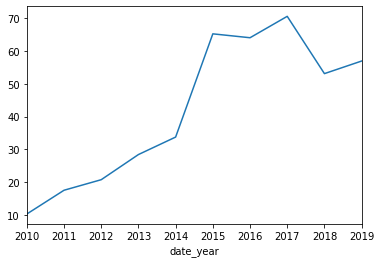

In [40]:
#Строим график

film_by_year_part.plot()
plt.show()


Видно как доля отношение количества фильмов с господдержкой  увеличивалось в динамике от 2010 к 2019 году. Больший процент поддержки получали фильмы с 2014 по 2018 года.

In [41]:
#Фильмы с бюджетом больше нуля по годам (по df_5)
df_5_years = df_5.pivot_table(index='date_year', values='title', aggfunc=['count']).sort_values('date_year', ascending=False)
df_5_years

,count
,title
date_year,
2019,529
2018,471
2017,355
2016,522
2015,456
2014,272
2013,179
2012,123


<div class="alert alert-danger">
<b>Комментарий ревьюера v4: </b> 
    
Тебе здесь нужно вывести количество фильмов, выходиших в прокат. Для этого тебе нужно отобрать только те строки датафрейма, где `box_office` больше нуля. И график далее вывести нужно только по фильмам, у которых сборы больше нуля.
    
Поэтому советую подправить df_5 и сделать, чтобы там `box_office` был больше нуля, тогда его можно было бы использовать здесь.
</div>

<div class="alert alert-info">
<b>Сделал </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v5: </b> 

Отлично!
</div>

In [42]:
#Сколько фильмов выходило по годам. Поскольку смотрим мы по датасету, где удалены строки с пропусками в сборах и в бюджете, имеем следующие значения
#film_by_year = df.groupby('date_year')['date_year'].count()
#film_by_year

#пришлось эту операцию провести раньше по ходу исследования чтобы сохранить данные до удаления из датафрейма строк с нулевым бюджетом

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 
    
Супер, то что надо.
</div>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

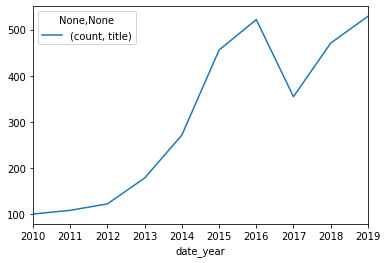

In [43]:
df_5_years.plot()

Видим, что в 2017 году был резкий спад, и затем очень быстрое восстановление в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [44]:
#отсортируем таблицу так, чтобы в выборку не попали значения с отрицательными сборами

df_box_office_per_year = df_5.pivot_table(index = 'date_year', values = 'box_office', aggfunc = ['mean', 'count', 'median'])
df_box_office_per_year.columns = ['mean', 'count', 'median']
df_box_office_per_year.sort_values('date_year', ascending = False).reset_index()

,date_year,mean,count,median
0,2019,9.126295e+07,529,4601033.60
1,2018,1.045690e+08,471,8751895.75
2,2017,1.365018e+08,355,9919415.00
3,2016,8.954467e+07,522,3777202.68
4,2015,8.449085e+07,456,4864744.05
5,2014,2.733352e+07,272,20310.00
6,2013,1.664788e+05,179,3580.00
7,2012,5.654815e+04,123,6220.00
8,2011,1.293832e+05,109,3000.00
9,2010,2.404608e+04,101,1710.00


<div class="alert alert-warning">
<b>Комментарий ревьюера: </b> Как ты думаешь, что может означать то, что медиана и среднее значение так сильно различаются?  </div>

<div class="alert alert-info">
<b>Если есть существенная разница между средним и медианным значением, значит в данных присутствуют выбросы (аномалии). НАпример какой то один фильм за год получил огромные сборы, а все остальные примерно одинаковые значения - тогда медиана и среднее будет отличаться. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> Абсолютно верно.  </div>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [45]:
#Сначала посмотрим на общий тренд - посмотрим какая из категорий фильмов самая прибыльная по медиане и среднему
pivot_tabel_age_box = df_5.query('date_year>=2015').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'count', 'median'])
pivot_tabel_age_box.columns = ['mean', 'count', 'median']
pivot_tabel_age_box.sort_values('age_restriction', ascending = False).reset_index()

,age_restriction,mean,count,median
0,«6+» - для детей старше 6 лет,1.775569e+08,311,13596322.70
1,«18+» - запрещено для детей,5.152675e+07,791,6164575.34
2,«16+» - для детей старше 16 лет,9.423120e+07,797,5477552.00
3,«12+» - для детей старше 12 лет,1.725849e+08,344,4928678.00
4,«0+» - для любой зрительской аудитории,8.989749e+06,90,2949626.65


Видим что самые кассовые фильмы идут из категории 6+ по среднему значению, и они же по медианному, то есть с ними собрали больше всего денег в прокате в целом. Однако количество фильмов в категориях сильно разнится.

In [46]:
pivot_tabel_age_box = df_5.pivot_table(index = ['date_year','age_restriction'], values = 'box_office', aggfunc = ['mean', 'count', 'median', 'sum'])
pivot_tabel_age_box.columns = ['mean', 'count', 'median', 'sum']
pivot_tabel_age_box.sort_values('date_year', ascending = False).reset_index()

,date_year,age_restriction,mean,count,median,sum
0,2019,«6+» - для детей старше 6 лет,1.588118e+08,80,1.252553e+07,1.270494e+10
1,2019,«18+» - запрещено для детей,5.531036e+07,183,5.603217e+06,1.012180e+10
2,2019,«16+» - для детей старше 16 лет,7.164842e+07,178,3.210718e+06,1.275342e+10
3,2019,«12+» - для детей старше 12 лет,1.491788e+08,85,3.405546e+06,1.268020e+10
4,2019,«0+» - для любой зрительской аудитории,5.915356e+06,3,3.885434e+06,1.774607e+07
5,2018,«6+» - для детей старше 6 лет,1.525194e+08,65,1.445867e+07,9.913759e+09
6,2018,«18+» - запрещено для детей,4.893903e+07,179,7.179466e+06,8.760086e+09
7,2018,«16+» - для детей старше 16 лет,1.050220e+08,155,8.751896e+06,1.627841e+10
8,2018,«12+» - для детей старше 12 лет,2.129447e+08,67,8.931966e+06,1.426729e+10
9,2018,«0+» - для любой зрительской аудитории,6.489800e+06,5,3.616937e+06,3.244900e+07


<div class="alert alert-danger">
<b>Комментарий ревьюера v2: </b> 
    
Ты забыл отсеять заглушку из сборов. Тогда лучше просто не стоит ее ставить на этапе предобработки.
</div>

<div class="alert alert-info">
<b>Убрал заглушку удалив строки, теперь красиво все</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3: </b> 
    
Отлично.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> Только вот в задании от тебя хотят динамику суммы продаж по возрастному рейтингу.
    
Для наглядности нужно добавить линейный график, где линия определенного цвета будет означать отдельный возрастной рейтинг. </div>

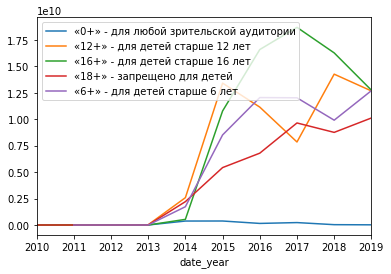

In [47]:
pivot_tabel_age_box.unstack().plot(y = 'sum')
plt.legend()
plt.show()


Интересно, что сборы фильмов 18+ , 6+ и 16+ в 2017 году не просели, в отличии от остальных. Вероятно в этих категориях были весьма кассовые фильмы.

<div class="alert alert-info">
<b>Вот так получилось</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> То что надо. Можно было бы еще увеличить размер график для красоты. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v3: </b> 
    
Извини, проглядела. График должен быть построен для суммы сборов, а не медианы.
</div>

<div class="alert alert-info">
<b>Построил по сумме, добавив агрегацию в предыдущую таблицу по сумме. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4: </b> 
    
Отлично!
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [48]:
df_6 = df.query('refundable_support > 0 or nonrefundable_support > 0')
df_6.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,date_year,film_support_money
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,300.000000,3.010000e+02,315.000000,315.000000
mean,1.115683e+08,1.160317e+07,4.810704e+07,1.340961e+08,6.036667,1.306983e+08,2016.742857,51.738582
std,5.844829e+06,2.515144e+07,5.988614e+07,1.912260e+08,1.159167,3.391903e+08,1.647398,17.004298
min,1.110001e+08,0.000000e+00,0.000000e+00,1.446246e+07,1.000000,1.550000e+03,2013.000000,4.404305
25%,1.110048e+08,0.000000e+00,2.500000e+07,4.615387e+07,5.400000,1.067649e+06,2015.000000,37.345810
50%,1.110102e+08,0.000000e+00,3.000000e+07,7.337955e+07,6.200000,1.274840e+07,2017.000000,59.226455
75%,1.110172e+08,1.000000e+07,4.000000e+07,1.500043e+08,6.700000,1.031348e+08,2018.000000,65.693118
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.400000,3.073569e+09,2019.000000,78.474525


<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> Данный датафрейм не очень показателен, так как здесь должны быть только те строки, где <b>сумма</b> возвратной и невозвратной гос поддержки больше нуля. </div>

<div class="alert alert-info">
<b>Вот так вышло. Я понять не могу почему среднее значение не считается, вместо него и максимального по столбцу film_support_money пишется inf.  </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v2: </b> 
    
Просто ты забыл отсеять строки с нулевым бюджетом, а точнее взять другой датафрейм.
</div>

<div class="alert alert-info">
<b>query('budget > 0')  - здесь и ниже вставил такой фильтр  </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v3: </b> 
    
Смотри, бюждет может быть больше нуля, НО это еще не значит, что в этот бюджет включена гос поддержка. Так что тебе нужны фильмы, где сумма возвратной и невозвратной гос поддержки больше нуля.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4: </b> 
    
Супер! Проще всего сохранить датафрейм с данным фильмом отдельно, чтобы далее его использовать, а не уточнять каждый раз условие.
</div>

<div class="alert alert-info">
<b>Сделал новый фрейм df_6 </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v5: </b> 

Супер.
</div>

У фильмов с господдержкой в среднем низкий рейтинг, 6.2

In [49]:
import seaborn as sns
columns_for_corr = [ 'refundable_support', 'nonrefundable_support', 'ratings', 'box_office','film_support_money' 
                    ]
df_6[columns_for_corr].corr()

,refundable_support,nonrefundable_support,ratings,box_office,film_support_money
refundable_support,1.000000,0.372622,0.005712,0.325531,-0.025356
nonrefundable_support,0.372622,1.000000,0.129516,0.443342,0.120342
ratings,0.005712,0.129516,1.000000,0.147052,-0.046337
box_office,0.325531,0.443342,0.147052,1.000000,-0.117436
film_support_money,-0.025356,0.120342,-0.046337,-0.117436,1.000000


Видим очень слабую корреляцию между рейтингом и сборами, то есть рейтинг фильтма может быт ьвысоким а сборы маленькими. 

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> Интересная идея - посчитать корреляцию. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера: </b> Только вот это можно делать со всеми столбцами, кроме года. Коэффициент корреляции Пирсона применяется только для непрерывных значений, а для дискретных значений (например, количество чего-либо, год), нужно использовать уже другой статистический метод. </div>


<div class="alert alert-danger">
<b>Комментарий ревьюера: </b> Данный этап нужно расширить, изучить еще парочку явлений и добавить графики, если это необходимо, не зря же ты испортирал seaborn.

Под каждую таблицу необходимо добавить краткие выводы, интерпретации полученного результата.</div>

<div class="alert alert-info">
<b>Год убрал из таблицы. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> Отлично. </div>

Посмотрим на количество фильмов по режиссеру, по жанру, преобладание жанров в год, годовые сборы фильмов по жанрам/режиссерам

In [50]:
#количество фильмов по режиссеру
df_6.groupby('director_name')['box_office'].count().sort_values(ascending=False) 


director_name
Р.Давлетьяров                         5
С.Андреасян                           4
Д.Дьяченко                            4
К.Шипенко                             3
Д.Шмидт                               3
                                     ..
С.Черников                            0
А.Попова                              0
М.Бальчюнас (псевдоним М.Вайсберг)    0
Ю.Разыков                             0
 Ф.Бондарчук                          0
Name: box_office, Length: 258, dtype: int64

Больше всего фильмов вышло у Давлетьярова, Дьяченко и Андреасяна - по 5, 4 фильма.

In [51]:
#количество фильмов по основному жанру
df_6.groupby('genre_main')['box_office'].count().sort_values(ascending=False) 

genre_main
драма          86
комедия        67
мультфильм     25
unknown        14
триллер        14
мелодрама      13
фэнтези        11
ужасы          10
фантастика      9
военный         9
приключения     6
семейный        6
детектив        5
боевик          5
мюзикл          4
история         4
криминал        3
спорт           3
детский         3
биография       3
реальное ТВ     1
Name: box_office, dtype: int64

Больше всего выходило драмы, комедии, мультфильм, мелодрама и триллер - в порядке убывания. Самые не популярные фильмы - реальное ТВ, биография, криминал, спорт.

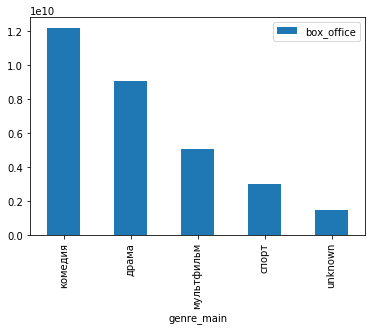

In [52]:
#топ 5 жанров по сборам
df_6.groupby(by='genre_main').agg({'box_office':'sum'}).sort_values(by='box_office', ascending=False).head(5).plot(kind='bar')

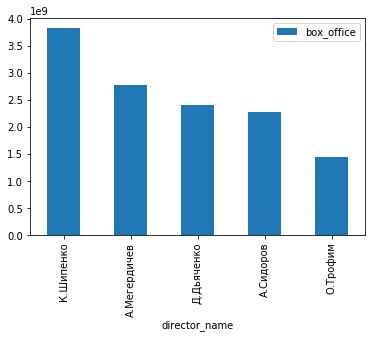

In [53]:
#топ 5 режиссеров по сборам
df_6.groupby(by='director_name').agg({'box_office':'sum'}).sort_values(by='box_office', ascending=False).head(5).plot(kind='bar')

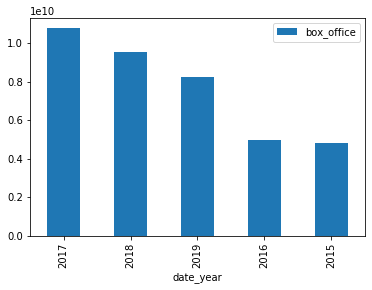

In [54]:
#топ 5 лет по сборам
df_6.groupby(by='date_year').agg({'box_office':'sum'}).sort_values(by='box_office', ascending=False).head(5).plot(kind='bar')

Странно, что для фильмов с господдержкой высокие сборы в 2017 году, ранее мы отметили что в целом для всех фильмов был 2017 год был плохим.

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> То что надо  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4: </b> 
    
Отлично! Вот сейчас исследование проведено только для фильмов с гос поддержкой.
</div>

### Шаг 5. Напишите общий вывод

Мы провели обработку данных и выяснили что в исходном датасете есть пропущенные или некорректные значения.
Скорее всего это связано с длительным сроком накопления базы датасета.
- Столбцы budget, refundable_support и nonrefundable_support а также financing_source - заполнены тольок 332 строки (4.4% от датасета). 
- Мы обнаружили среднюю корреляцию между возвратным/невозвратным финансирование и бюджетом (в среднем доля финансирования составляет до 59% от бюджета). 
- Также мы выяснили что фильмы с господдержкой в среднем имеют оценку 5.5, что ниже среднего.
- Видим что самые кассовые фильтмы идут из категории 6+ по среднему значению, и они же по медианному, то есть с ними собрали больше всего денег в прокате в целом
- 2017 год для фильмов с господдержкой оказался самым кассовым
- К.Шипенко - самый кассовый режиссер
- Комедия - самый кассовый жанр
- Чаще всего господдержку получили фильмы жанров драмы, комедии, мультфильм
- Больше всего фильмов с господдержкой вышло у Давлетьярова, Дьяченко и Андреасяна - по 4 фильма

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> Хороший краткий вывод, который можно было бы дополнить информацией, полученной на последнем этапе о фильмах с гос поддержкой. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> 

Руслан, ты хорошо поработал над своим первым сборным проектом: подготовил данные для анализа, подсчитал все требуемые метрики и провел пусть краткое, но исследование.

Предлагаю тебе немного доработать проект, чтобы довести его до совершенства:

1. Избавиться от дублей по номеру прокатного удостоверения.
2. Оставить рейтинг в имеющейся шкале.
3. Сохранить изменения в столбце с типом фильма.
4. Поработать над строками, где сумма гос поддержки больше бюджета.
5. Добавить столбцы с долей гос поддержки, основным режиссером и жанром.
6. Посчитать количество фильмов, вышедших в прокат, по года + добавить доли.
7. Добавить график для изменения суммы продаж по годам и возрастным рейтингам.
8. Доработать собственное исследование (взять нужные данные, расширить исследование).

Если будут вопросы, обращайся, с удовольствием на них отвечу.

</div>

<div class="alert alert-info">
<b>Выводы дополнил. Спасибо большое за проверку! Вроде все устранил. Если нет - подсвети пожалйста? </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> 

Руслан, спасибо, что прислушался к рекомендациям, теперь проект стал еще лучше. Осталось только подправить некоторые детели:

1. Не заполнять столбец со сборами заглушкой, удалить строку с пропуском в номере прокатного удостоверения.
2. Сохранить удаление строк с нулевым доходом для всего датафрейма.
3. Сохранить ФИО режиссера в один столбец.

Возникнут еще вопросы, пиши :)

</div>

 <div class="alert alert-info">
<b>
 - 1. Сделал - не стл заполнять заглушкой, удалил строку с пропуском в номере.
 - 2. Я в основном удалил по итогу
 - 3. СОхранил в отдельный столбец, фамилию как новый столбец убрал из датасета.
 
 Спасибо за проверку, удивился что в выходной день ответили даже!  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3: </b> 

Руслан, для ревью нет выходных, мы проверяем работы каждый день в течении 24 часов с момента отправки, ведь многие студенты особенно активно занимаются именно на выходных.
    
Итак, уде лучше. Никаких лишних заглушек, да и столбцы с режиссерами верные. Осталось только:
    
1. Посчитать долю фильмов, выходивших в прокат.
2. Для всего датафрейма отсеять строки с нулевым бюджетом или заполнить его чем-нибудь.
3. Для своего исследования взять те строки, где сумма возвратной и невозвратной гос поддержки больше нуля, а не бюджет.
    
Мы на финишной прямой!

</div>

<div class="alert alert-info">
<b> Спасибо! Медленно, но верно, как говорится! 
    я окончательно запутался в наших комментариях и последовательности((( 
    
    - доля фильмов, выходивших в прокат - посчитал и сделал график.
    - удалил строки с нулевым бюджетом, сделал df_5, только вот нигде потом не использовал. Кажется я не понимаю для чег оего сделал. Может мне надо как то с чистого листа начат ьпроект, переписать просто из этой тетрадки все верные действия?
    - Для своего исследования взял строки, где сумма гос поддержки больше нуля df.query('refundable_support > 0 or nonrefundable_support > 0') .
    Спасибо за терпение! 
    </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4: </b> 
    
Руслан, на самом деле ты уже почти справился с проектом, остался маленький нюанс и все, так что начинать проект сначала не имеет смысла. Сейчас исследование фильмов с гос поддержкой проведено верно, доля фильмов со сборами также посчитана верно. 
    
    
Тебе осталось только настроить `df_5` так, чтобы не бюджет был больше нуля, а чтобы сборы были больше нуля. После чего использовать этот датафрейм при создании `df_years`. А нулевой (именно нулевой, а не NaN) бюджет нужно удалить на этапе предобработки. 
    
Еще разов повторюсь, чтобы отсеять фильмы, вышедшие в прокат, мы должны выбрать только те строки, где не пропущен столбец со сборами.
    
Осталось совсем чуть-чуть! Ты близок к цели!
</div>

<div class="alert alert-info">
<b>Спасибо! 
    
    - Строки с нулевым значением удалил  
    - df_5 настроил чтобы сборы были больше 0
    - изменил df_years  с применением df_5
    - в исследовании сделал df_6 чтобы не писать условие постоянно. 
    
    Сборный проект это серьезное испытание, думаю что второй раз сборный проект будет даваться легче мне. Я точно усвоил что:
    - мне удобно делать пометки прямо в коде, распысывать что я делаю и для чего - так проще вернутсья потом и вспомнить что делал.
    - мне надо разбивать каждое действие на отдельную ячейку кода, так я проще потом править и искать ошибки
    - мне надо для себя придумать упрощенную систему сохзранения датафреймов, потому что df_5 или df_6 - как потом вспомнить что есть что? и громоздить названия длинные тоже не прикольно. надо искать упрощения.
    - надо подучить правила оформления тетрадки jupiter
    
    Посмотри пожалуйста, вроде все теперь поправил? </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v5: </b> 

Руслан, теперь все правильно. Абсолютно логичные выводы. Действительно, код лучше всего комментировать и разбивать на ячейки. Также верное замечание про название переменных, лучше вкладывать в них смысл. Особенно ясно понимаешь это, когда вовращаешься к проекту через пару дней или через неделю.
    
С удовольствием принимаю твой проект и желаю успехов далее!
    
    
</div>